# SHATI BISWAS
## ENROLL NO: 24565004
## **Assignment_02** on develop a predictive model to estimate tip amounts in
### restaurants based on customer billing and demographic details
## MACHINE LEARNING

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [3]:
# Load the dataset
df = pd.read_csv('tips (data for regression problem).csv')

In [4]:
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [5]:
df.shape

(244, 7)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [7]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [8]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


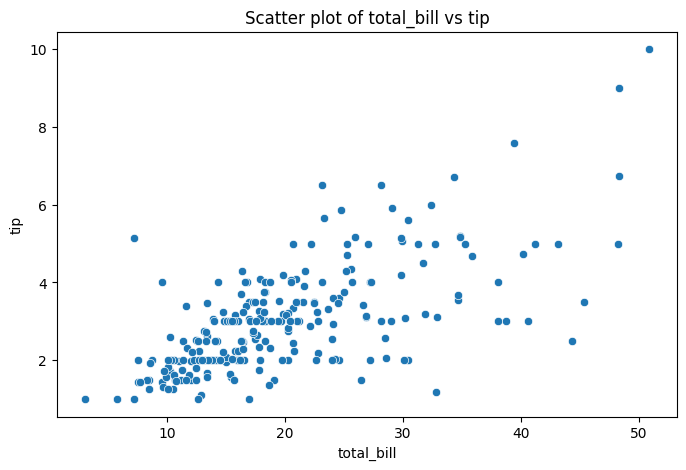

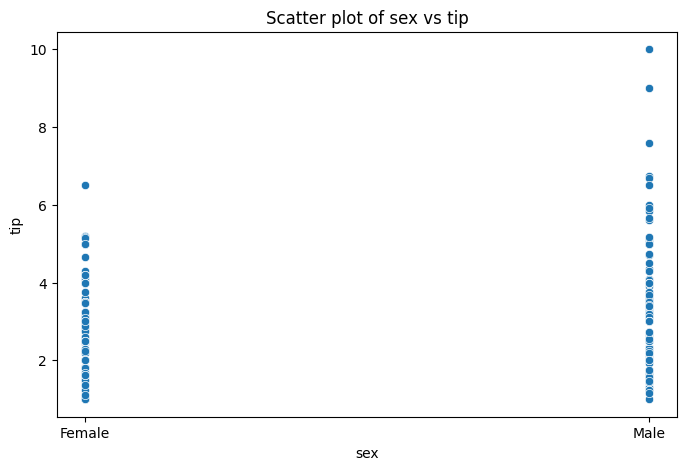

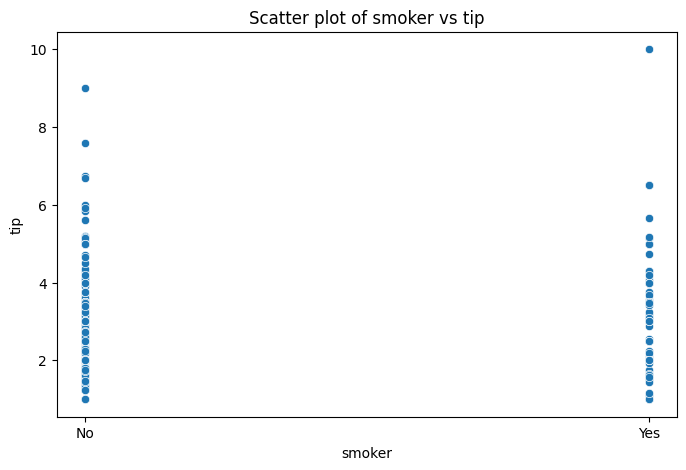

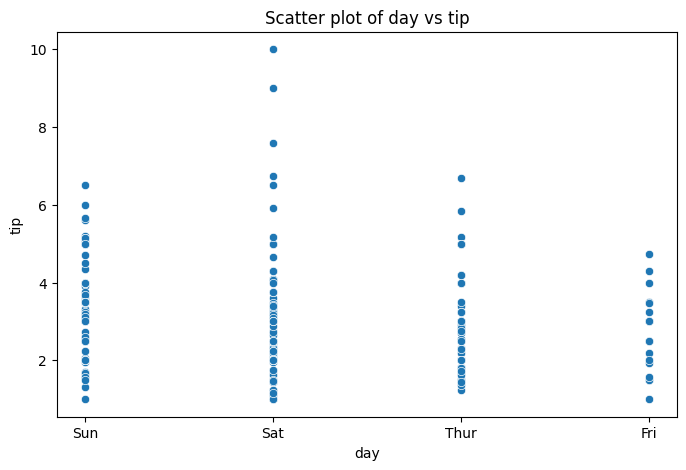

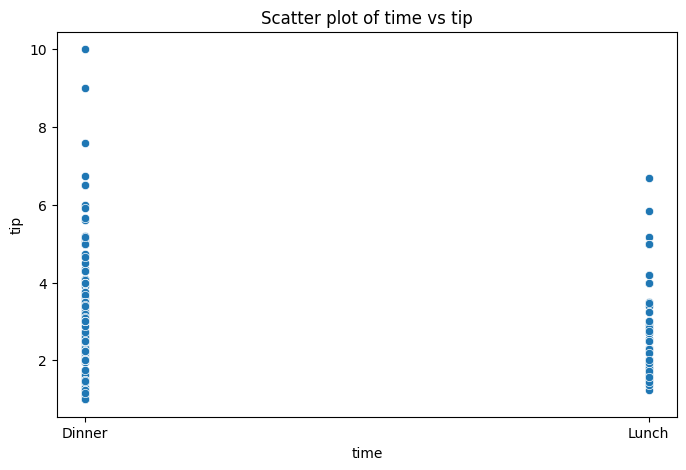

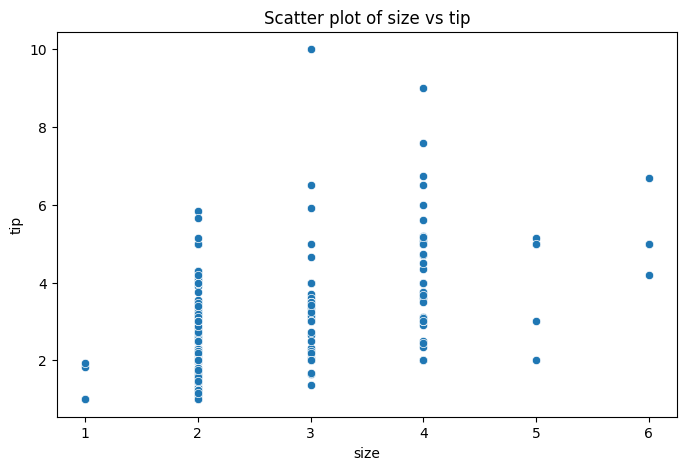

In [9]:
# Exploratory Data Analysis (EDA)

# Scatter Plots to observe relationships with 'tip' (assuming 'tip' is the target variable)
target = 'tip'
predictors = [col for col in df.columns if col != target]

for predictor in predictors:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[predictor], y=df[target])
    plt.title(f'Scatter plot of {predictor} vs {target}')
    plt.xlabel(predictor)
    plt.ylabel(target)
    plt.show()

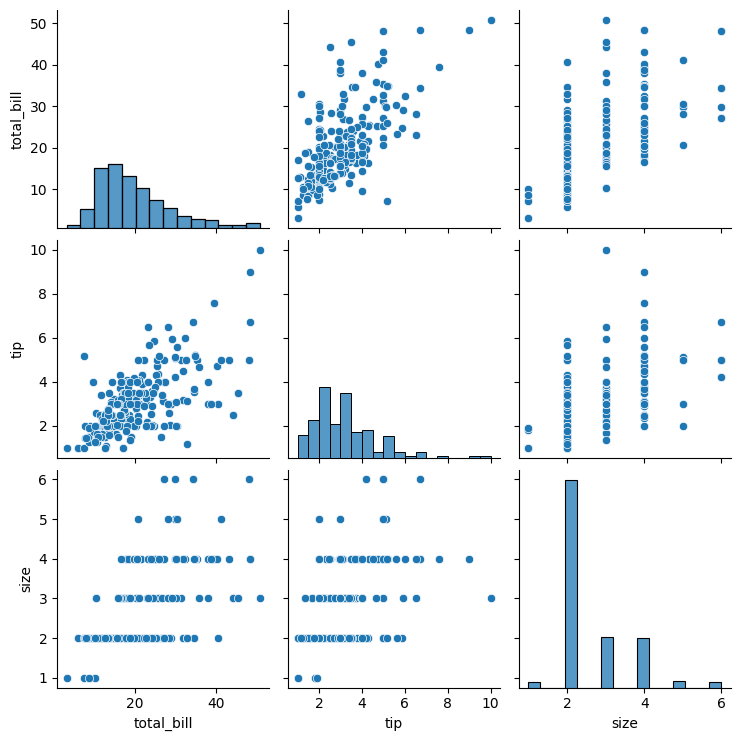

In [10]:
# Pair plot for multiple features
sns.pairplot(df[['total_bill', 'tip', 'size']])
plt.show()

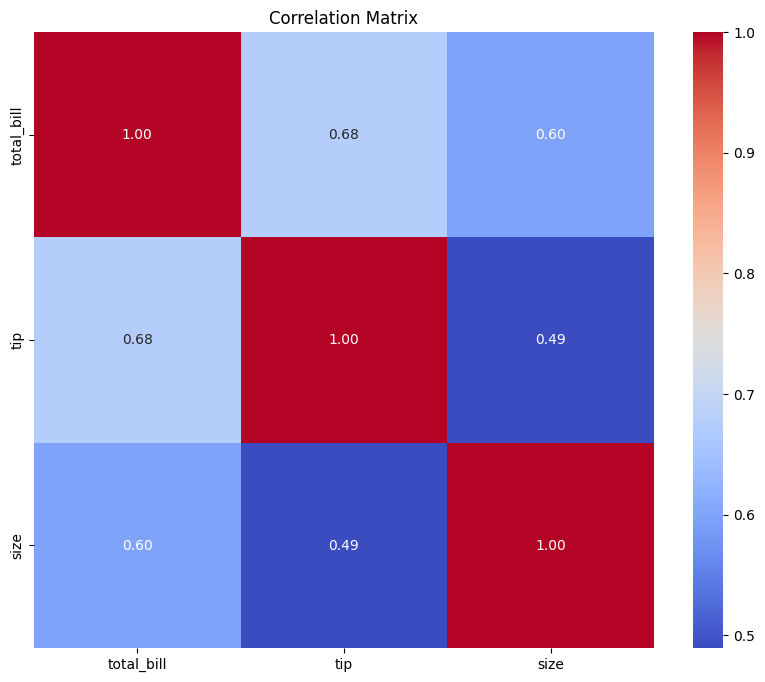

In [12]:
# Correlation Matrix (Heatmap) to identify relationships between variables
# Correlation Matrix (Heatmap)
plt.figure(figsize=(10, 8))

# Select only numeric features for correlation analysis
numeric_features = df.select_dtypes(include=['number'])

# Calculate and plot the correlation matrix
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

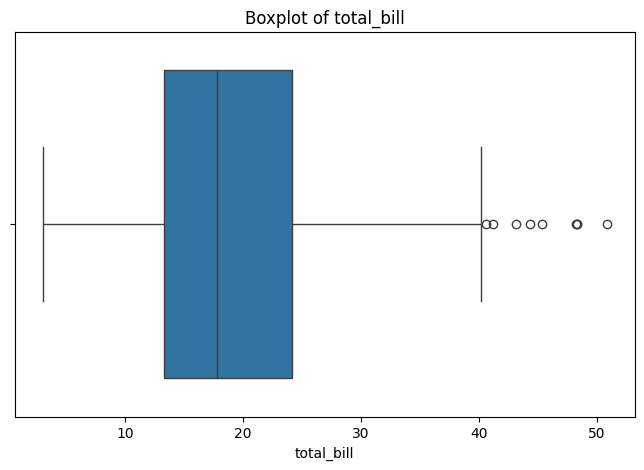

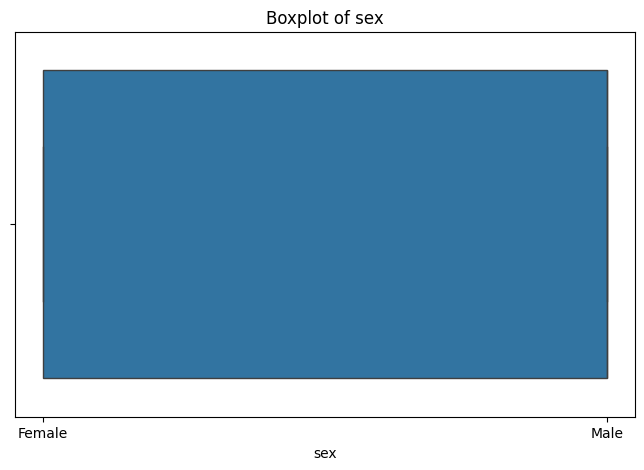

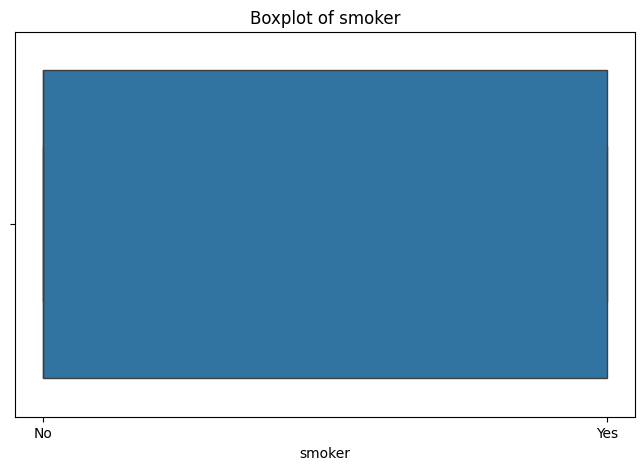

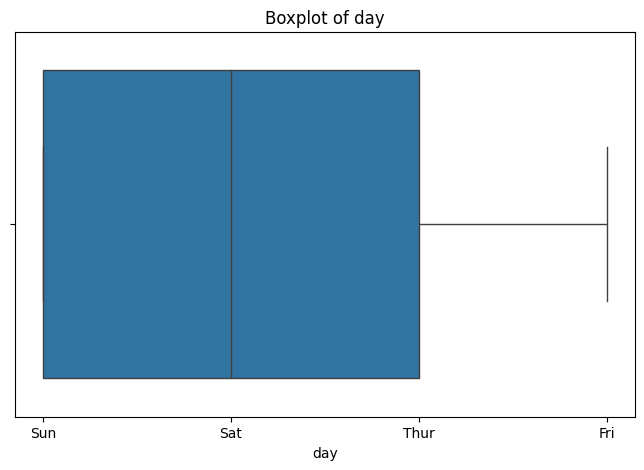

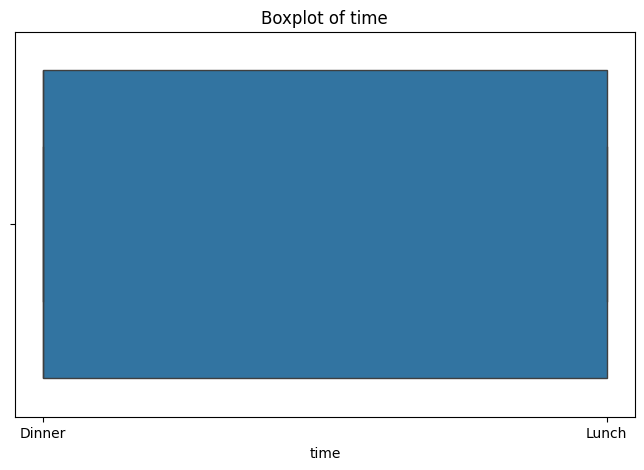

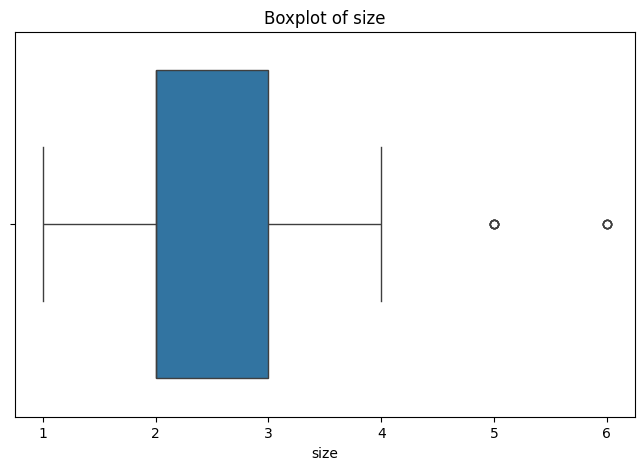

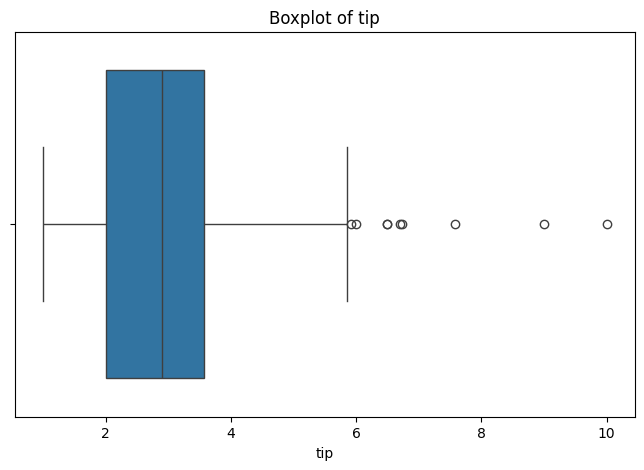

In [13]:
# Boxplot to detect outliers
for col in predictors + [target]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

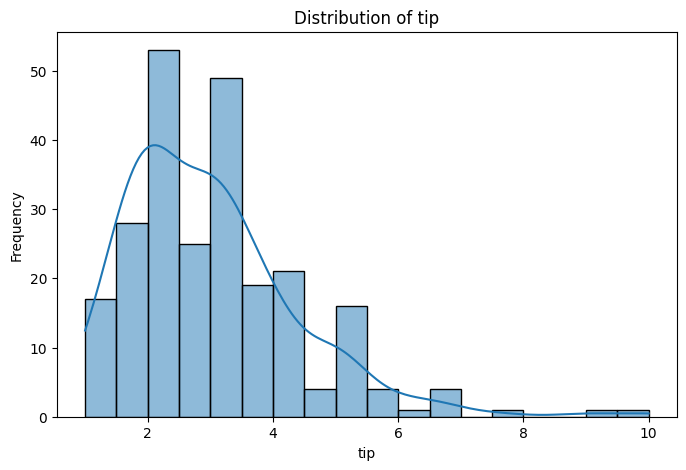

In [14]:
# Distribution Plot for Target Variable
plt.figure(figsize=(8, 5))
sns.histplot(df[target], kde=True)
plt.title(f'Distribution of {target}')
plt.xlabel(target)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# prompt:  Statistical Tests for Linearity (Rainbow Test)

import statsmodels.formula.api as smf

# Assuming 'total_bill' is your independent variable and 'tip' is your dependent variable
# You may need to adjust this based on your specific data and hypothesis

# Create a linear regression model using statsmodels
model = smf.ols('tip ~ total_bill', data=df).fit()

# Perform the Rainbow test (reset())
rainbow_test = sm.stats.diagnostic.linear_rainbow(model)

# Print the results of the test
print("Rainbow Test Results:")
rainbow_test

# Interpret the p-value of the test
# If the p-value is below a significance level (e.g., 0.05),
# it suggests that the linearity assumption may be violated.

In [17]:
import statsmodels.formula.api as smf

# Assuming 'total_bill' is your independent variable and 'tip' is your dependent variable


# Create a linear regression model using statsmodels
model = smf.ols('tip ~ total_bill', data=df).fit()

# Perform the Rainbow test (reset())
rainbow_test = sm.stats.diagnostic.linear_rainbow(model)

# Print the results of the test
print("Rainbow Test Results:")
rainbow_test

# Interpret the p-value of the test
# If the p-value is below a significance level (e.g., 0.05),
# it suggests that the linearity assumption may be violated.

Rainbow Test Results:


(1.2291480226129028, 0.1291192152551375)

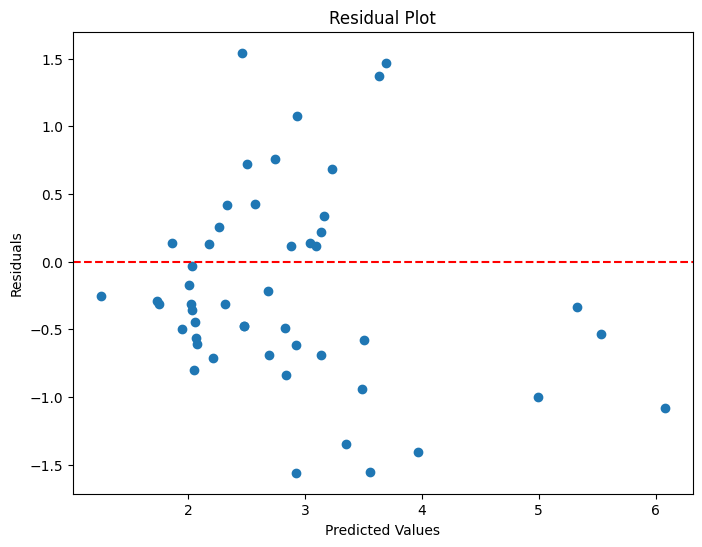

In [18]:
# Assuming 'total_bill' is your independent variable and 'tip' is your dependent variable
X = df[['total_bill']]
y = df['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

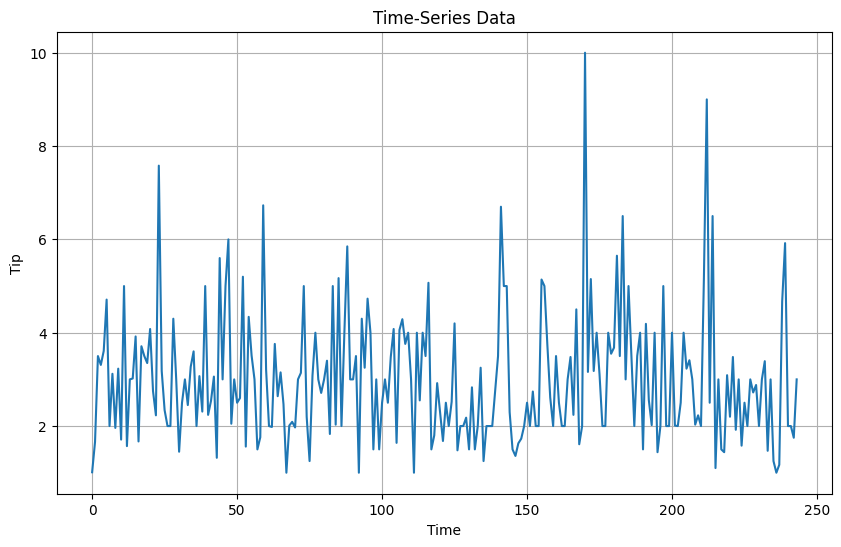

In [20]:
# Create a line plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['tip'])
plt.xlabel('Time')
plt.ylabel('Tip')
plt.title('Time-Series Data')
plt.grid(True)
plt.show()

# Using regression techniques

In [21]:
# Define X and y
X = df[['total_bill', 'size']]  # Assuming 'total_bill' and 'size' are predictors
y = df['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store model results
model_results = {}

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
model_results['Linear Regression'] = {
    'mse': mean_squared_error(y_test, y_pred_linear),
    'mae': mean_absolute_error(y_test, y_pred_linear),
    'r2': r2_score(y_test, y_pred_linear)
}

In [22]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
model_results['Ridge Regression'] = {
    'mse': mean_squared_error(y_test, y_pred_ridge),
    'mae': mean_absolute_error(y_test, y_pred_ridge),
    'r2': r2_score(y_test, y_pred_ridge)
}

In [23]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can tune the alpha parameter
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
model_results['Lasso Regression'] = {
    'mse': mean_squared_error(y_test, y_pred_lasso),
    'mae': mean_absolute_error(y_test, y_pred_lasso),
    'r2': r2_score(y_test, y_pred_lasso)
}

In [24]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
model_results['Decision Tree Regression'] = {
    'mse': mean_squared_error(y_test, y_pred_tree),
    'mae': mean_absolute_error(y_test, y_pred_tree),
    'r2': r2_score(y_test, y_pred_tree)
}

In [25]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
model_results['Random Forest Regression'] = {
    'mse': mean_squared_error(y_test, y_pred_rf),
    'mae': mean_absolute_error(y_test, y_pred_rf),
    'r2': r2_score(y_test, y_pred_rf)
}

In [26]:
# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
model_results['Support Vector Regression'] = {
    'mse': mean_squared_error(y_test, y_pred_svr),
    'mae': mean_absolute_error(y_test, y_pred_svr),
    'r2': r2_score(y_test, y_pred_svr)
}

In [27]:
# K-Nearest Neighbors Regression (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
model_results['KNN Regression'] = {
    'mse': mean_squared_error(y_test, y_pred_knn),
    'mae': mean_absolute_error(y_test, y_pred_knn),
    'r2': r2_score(y_test, y_pred_knn)
}

In [28]:
# Print results
for model_name, metrics in model_results.items():
  print(f"\n{model_name}:")
  print(f"  MSE: {metrics['mse']:.4f}")
  print(f"  MAE: {metrics['mae']:.4f}")
  print(f"  R-squared: {metrics['r2']:.4f}")


Linear Regression:
  MSE: 0.6486
  MAE: 0.6639
  R-squared: 0.4811

Ridge Regression:
  MSE: 0.6476
  MAE: 0.6635
  R-squared: 0.4819

Lasso Regression:
  MSE: 0.5666
  MAE: 0.6256
  R-squared: 0.5467

Decision Tree Regression:
  MSE: 1.0154
  MAE: 0.8237
  R-squared: 0.1876

Random Forest Regression:
  MSE: 0.7661
  MAE: 0.7093
  R-squared: 0.3871

Support Vector Regression:
  MSE: 0.5347
  MAE: 0.5607
  R-squared: 0.5722

KNN Regression:
  MSE: 0.7394
  MAE: 0.7171
  R-squared: 0.4084


# Identify which factors significantly impact tip amounts

In [29]:
# Create a model with all potential predictors
model = smf.ols('tip ~ total_bill + size + day', data=df).fit()

# Print the summary of the model to view p-values for each predictor
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     42.07
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           6.05e-31
Time:                        09:01:56   Log-Likelihood:                -347.69
No. Observations:                 244   AIC:                             707.4
Df Residuals:                     238   BIC:                             728.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7458      0.281      2.651      

In [30]:
# Feature Importance from Random Forest
X = df[['total_bill', 'size']]  # Select your potential predictors
y = df['tip']
rf_model = RandomForestRegressor()
rf_model.fit(X, y)
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nFeature Importance from Random Forest:")
feature_importance_df



Feature Importance from Random Forest:


,Feature,Importance
0,total_bill,0.911235
1,size,0.088765


## Prediction Accuracy: Build and evaluate models to forecast tips effectively

In [31]:
# Define X and y (features and target variable)
X = df[['total_bill', 'size']]  # Select your features
y = df['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store model results (R-squared scores)
model_results = {}

# Function to train and evaluate a model
def evaluate_model(model, model_name):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  model_results[model_name] = r2

# Create and evaluate various regression models
evaluate_model(LinearRegression(), 'Linear Regression')
evaluate_model(Ridge(), 'Ridge Regression')
evaluate_model(Lasso(), 'Lasso Regression')
evaluate_model(DecisionTreeRegressor(), 'Decision Tree Regression')
evaluate_model(RandomForestRegressor(), 'Random Forest Regression')
evaluate_model(SVR(), 'Support Vector Regression')
evaluate_model(KNeighborsRegressor(), 'K-Nearest Neighbors Regression')

# Print the R-squared scores for each model
for model_name, r2 in model_results.items():
  print(f"{model_name}: R-squared = {r2:.4f}")

# Choose the model with the highest R-squared score as the best performing model
best_model_name = max(model_results, key=model_results.get)
print(f"\nThe best performing model is: {best_model_name}")

Linear Regression: R-squared = 0.4811
Ridge Regression: R-squared = 0.4819
Lasso Regression: R-squared = 0.5467
Decision Tree Regression: R-squared = 0.1904
Random Forest Regression: R-squared = 0.4052
Support Vector Regression: R-squared = 0.5722
K-Nearest Neighbors Regression: R-squared = 0.4084

The best performing model is: Support Vector Regression


# Insights for Management: Provide actionable insights to improve customer service strategies and revenue management

This dataset has less features (7) for improving customer service strategies and revenue management. However, Example Code to Showcase Some of these Insights:

**# Example 1: Identify the relationship between total bill and tip amount**


In [32]:
# Calculate correlation between total_bill and tip
correlation = df['total_bill'].corr(df['tip'])
print("Correlation between Total Bill and Tip:", correlation)

Correlation between Total Bill and Tip: 0.6757341092113641


**# Example 2: Explore if there's a difference in tip amounts on different days**
**# Use groupby and mean to analyze average tips on different days **

Average Tip by Day:
 day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


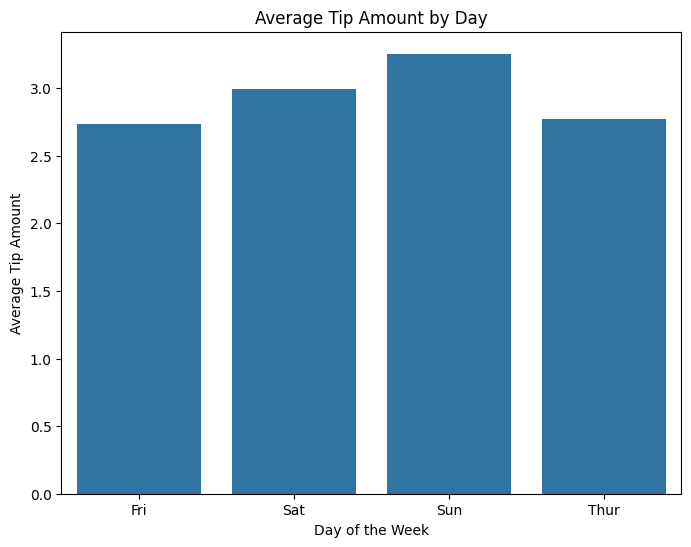

In [33]:
average_tip_by_day = df.groupby('day')['tip'].mean()
print("Average Tip by Day:\n", average_tip_by_day)

# Visualize the average tips by day with a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=average_tip_by_day.index, y=average_tip_by_day.values)
plt.xlabel("Day of the Week")
plt.ylabel("Average Tip Amount")
plt.title("Average Tip Amount by Day")
plt.show()

In [34]:
# Example 3: Basic Linear Regression Model (We can refine this with more variables)
X = df[['total_bill']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score of Linear Regression Model: {r2:.4f}")

# By analyzing model coefficients, you can infer how a unit change in total bill affects the tip amount.
print(f"Linear Regression Model Coefficients: {model.coef_}")

R-squared score of Linear Regression Model: 0.5449
Linear Regression Model Coefficients: [0.10696371]


**Here, we can see R-squared score of Linear Regression Model has been improved little bit.**

**------THANK YOU-------**